In [5]:
import shutil

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
shutil.copy("/content/drive/MyDrive/Colab Notebooks/archive (5).zip",'datasets.zip')

'datasets.zip'

In [8]:
!unzip datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [9]:
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
data=[]
labels=[]
dir=r"data/with_mask"
for img in os.listdir(dir):
  img_path=os.path.join(dir,img)
  Image=keras.utils.load_img(img_path,target_size=(96,96))
  Image=np.array(Image)
  data.append(Image)
  labels.append("with_mask")


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [10]:
dir=r"data/without_mask"
for img in os.listdir(dir):
  img_path=os.path.join(dir,img)
  Image=keras.utils.load_img(img_path,target_size=(96,96))
  Image=np.array(Image)
  data.append(Image)
  labels.append("without_mask")

In [11]:
data=np.array(data)
labels=np.array(labels)

In [12]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
labels=encoder.fit_transform(labels)

In [13]:
from sklearn.model_selection import train_test_split
X, X_test,y,y_test=train_test_split(data,labels,test_size=0.15,random_state=42)
X=X/255
X_test=X_test/255
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True)

In [14]:
dir="data"
import pathlib
data_dir = pathlib.Path(dir)
mask=list(data_dir.glob('with_mask/*'))

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

7553


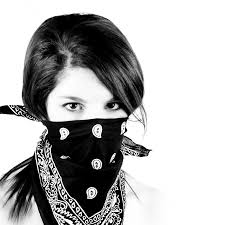

In [16]:
PIL.Image.open(str(mask[7]))

In [17]:
no_mask=list(data_dir.glob('without_mask/*'))

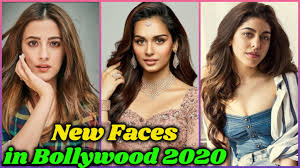

In [18]:
PIL.Image.open(str(no_mask[1]))

In [19]:
from tensorflow.keras import datasets, layers, models
ann = models.Sequential([
        layers.Flatten(input_shape=(96,96,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(2, activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model=ann.fit(X_train, y_train, epochs=30,validation_data = (x_val, y_val),validation_split=0.33)

Epoch 1/30
171/171 [==============================] - 7s 25ms/step - loss: 3.3088 - accuracy: 0.7075 - val_loss: 0.4053 - val_accuracy: 0.8297
Epoch 2/30
171/171 [==============================] - 4s 22ms/step - loss: 0.3663 - accuracy: 0.8430 - val_loss: 0.4924 - val_accuracy: 0.7695
Epoch 3/30
171/171 [==============================] - 4s 22ms/step - loss: 0.3737 - accuracy: 0.8413 - val_loss: 0.3671 - val_accuracy: 0.8390
Epoch 4/30
171/171 [==============================] - 4s 23ms/step - loss: 0.3282 - accuracy: 0.8618 - val_loss: 0.3555 - val_accuracy: 0.8380
Epoch 5/30
171/171 [==============================] - 4s 22ms/step - loss: 0.3169 - accuracy: 0.8675 - val_loss: 0.3669 - val_accuracy: 0.8474
Epoch 6/30
171/171 [==============================] - 4s 21ms/step - loss: 0.3074 - accuracy: 0.8715 - val_loss: 0.4435 - val_accuracy: 0.8224
Epoch 7/30
171/171 [==============================] - 4s 21ms/step - loss: 0.2680 - accuracy: 0.8888 - val_loss: 0.3334 - val_accuracy: 0.8546

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.preprocessing


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(" Accuracy on test data is: ",ann.evaluate(X_test,y_test)[1])
print("\nClassification Report: \n", classification_report(y_test, y_pred_classes))

36/36 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.9056
 Accuracy on test data is:  0.9055604338645935

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       567
           1       0.92      0.89      0.90       566

    accuracy                           0.91      1133
   macro avg       0.91      0.91      0.91      1133
weighted avg       0.91      0.91      0.91      1133



In [21]:
ann.evaluate(X_test,y_test)


36/36 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.9056


[0.30629175901412964, 0.9055604338645935]

In [22]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                      padding='same',input_shape=(96, 96, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='sigmoid')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model=cnn.fit(X_train, y_train, epochs=30,validation_data = (x_val, y_val),validation_split=0.33)
#epoch 30

Epoch 1/30
171/171 [==============================] - 9s 14ms/step - loss: 0.4093 - accuracy: 0.8210 - val_loss: 0.2930 - val_accuracy: 0.8754
Epoch 2/30
171/171 [==============================] - 2s 12ms/step - loss: 0.2146 - accuracy: 0.9168 - val_loss: 0.2842 - val_accuracy: 0.8723
Epoch 3/30
171/171 [==============================] - 2s 12ms/step - loss: 0.1782 - accuracy: 0.9329 - val_loss: 0.2637 - val_accuracy: 0.8930
Epoch 4/30
171/171 [==============================] - 2s 12ms/step - loss: 0.1247 - accuracy: 0.9540 - val_loss: 0.2871 - val_accuracy: 0.9034
Epoch 5/30
171/171 [==============================] - 2s 11ms/step - loss: 0.0828 - accuracy: 0.9690 - val_loss: 0.2574 - val_accuracy: 0.9107
Epoch 6/30
171/171 [==============================] - 2s 12ms/step - loss: 0.0564 - accuracy: 0.9798 - val_loss: 0.2727 - val_accuracy: 0.9200
Epoch 7/30
171/171 [==============================] - 2s 12ms/step - loss: 0.0495 - accuracy: 0.9804 - val_loss: 0.3133 - val_accuracy: 0.9211

In [23]:
y_pred=cnn.predict(X_test)

36/36 [==============================] - 0s 5ms/step


In [24]:
cnn.evaluate(X_test,y_test)

36/36 [==============================] - 0s 6ms/step - loss: 0.3308 - accuracy: 0.9223


[0.33077457547187805, 0.9223300814628601]

In [25]:
y_pred[:5]

array([[5.8587170e-01, 4.6845254e-01],
       [9.9999952e-01, 3.5369501e-06],
       [9.9790800e-01, 1.8976029e-03],
       [9.5658207e-01, 4.1237086e-02],
       [1.0000000e+00, 7.2980497e-09]], dtype=float32)

In [26]:
y_classes=[np.argmax(elem) for elem in y_pred]

In [27]:
y_classes[:5]

[0, 0, 0, 0, 0]

In [28]:
y_pred=cnn.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_classes, normalize=True))
print(metrics.classification_report(y_test, y_classes))
print(metrics.confusion_matrix(y_test, y_classes))

36/36 [==============================] - 0s 5ms/step
0.9223300970873787
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       567
           1       0.93      0.92      0.92       566

    accuracy                           0.92      1133
   macro avg       0.92      0.92      0.92      1133
weighted avg       0.92      0.92      0.92      1133

[[526  41]
 [ 47 519]]


In [29]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(96, 
                                                              96,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [30]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
        data_augmentation,
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                      padding='same',input_shape=(96, 96, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='sigmoid')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model=cnn.fit(X_train, y_train, epochs=30,validation_data = (x_val, y_val),validation_split=0.33)

Epoch 1/30
171/171 [==============================] - 7s 32ms/step - loss: 0.4145 - accuracy: 0.7905 - val_loss: 0.3041 - val_accuracy: 0.8660
Epoch 2/30
171/171 [==============================] - 5s 30ms/step - loss: 0.2765 - accuracy: 0.8899 - val_loss: 0.2769 - val_accuracy: 0.8847
Epoch 3/30
171/171 [==============================] - 5s 30ms/step - loss: 0.2360 - accuracy: 0.9062 - val_loss: 0.2522 - val_accuracy: 0.8941
Epoch 4/30
171/171 [==============================] - 5s 30ms/step - loss: 0.2215 - accuracy: 0.9120 - val_loss: 0.2417 - val_accuracy: 0.8972
Epoch 5/30
171/171 [==============================] - 5s 30ms/step - loss: 0.1925 - accuracy: 0.9260 - val_loss: 0.2154 - val_accuracy: 0.9190
Epoch 6/30
171/171 [==============================] - 5s 31ms/step - loss: 0.1818 - accuracy: 0.9271 - val_loss: 0.1949 - val_accuracy: 0.9263
Epoch 7/30
171/171 [==============================] - 5s 30ms/step - loss: 0.1689 - accuracy: 0.9371 - val_loss: 0.2847 - val_accuracy: 0.8899

In [31]:
cnn.evaluate(X_test,y_test)

36/36 [==============================] - 0s 7ms/step - loss: 0.0856 - accuracy: 0.9744


[0.08560115098953247, 0.9744042158126831]

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_classes)
cm

array([[526,  41],
       [ 47, 519]])

In [33]:
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(elem) for elem in y_pred]
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_classes, normalize=True))
print(metrics.classification_report(y_test, y_classes))
print(metrics.confusion_matrix(y_test, y_classes))

36/36 [==============================] - 0s 5ms/step
0.9744042365401588
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       567
           1       0.97      0.98      0.97       566

    accuracy                           0.97      1133
   macro avg       0.97      0.97      0.97      1133
weighted avg       0.97      0.97      0.97      1133

[[550  17]
 [ 12 554]]


Text(24.0, 0.5, 'Truth')

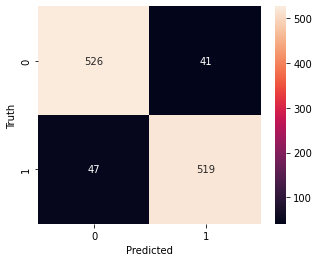

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True,fmt='0.0f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

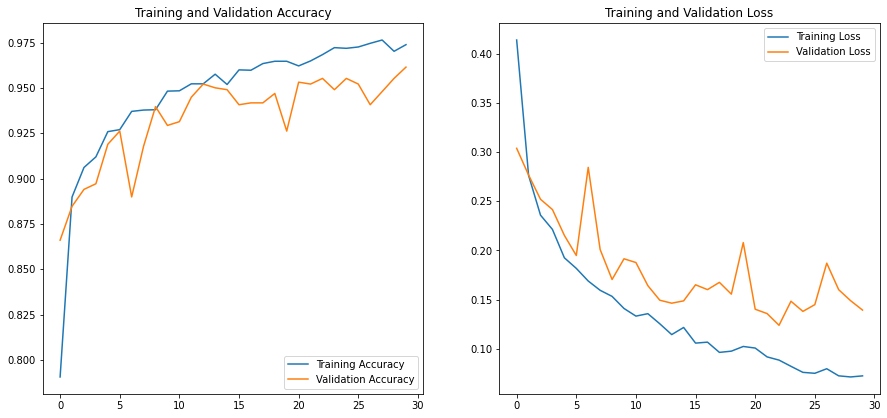

In [35]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [36]:
print(model.history)

{'loss': [0.4144657254219055, 0.27648237347602844, 0.23598267138004303, 0.22146648168563843, 0.19254539906978607, 0.18175864219665527, 0.16888020932674408, 0.1594245880842209, 0.15323330461978912, 0.14090505242347717, 0.13312529027462006, 0.13560882210731506, 0.12531009316444397, 0.11428860574960709, 0.12155985087156296, 0.10561200231313705, 0.10659195482730865, 0.09615316241979599, 0.09741581231355667, 0.10219655185937881, 0.10057326406240463, 0.09155862033367157, 0.0882880836725235, 0.08195716142654419, 0.07581215351819992, 0.07485002279281616, 0.0794983059167862, 0.07226227223873138, 0.07112714648246765, 0.07222443073987961], 'accuracy': [0.7905442714691162, 0.8898662328720093, 0.9061755537986755, 0.912039577960968, 0.9259666204452515, 0.9270661473274231, 0.937144935131073, 0.9378779530525208, 0.9380611777305603, 0.9483232498168945, 0.9485065340995789, 0.9523547887802124, 0.9523547887802124, 0.9576690196990967, 0.9519882798194885, 0.9600512981414795, 0.9598680734634399, 0.9635331034

In [37]:
print(X_test.shape)

(1133, 96, 96, 3)


In [38]:
print(X_train.shape)

(5457, 96, 96, 3)


In [39]:
print(x_val.shape)

(963, 96, 96, 3)


In [46]:
pred=[]
dir=[]
directory="//WhatsApp Image 2022-11-29 at 11.21.09.jpeg"
img=keras.utils.load_img(directory,target_size=(96,96))
img=np.array(img)
pred.append(img)
dir.append(directory)
pred=np.array(pred)

In [47]:
y_pred=cnn.predict(pred/255)

1/1 [==============================] - 0s 80ms/step


In [48]:
y_pred

array([[0.9938313 , 0.05935829]], dtype=float32)

with_mask


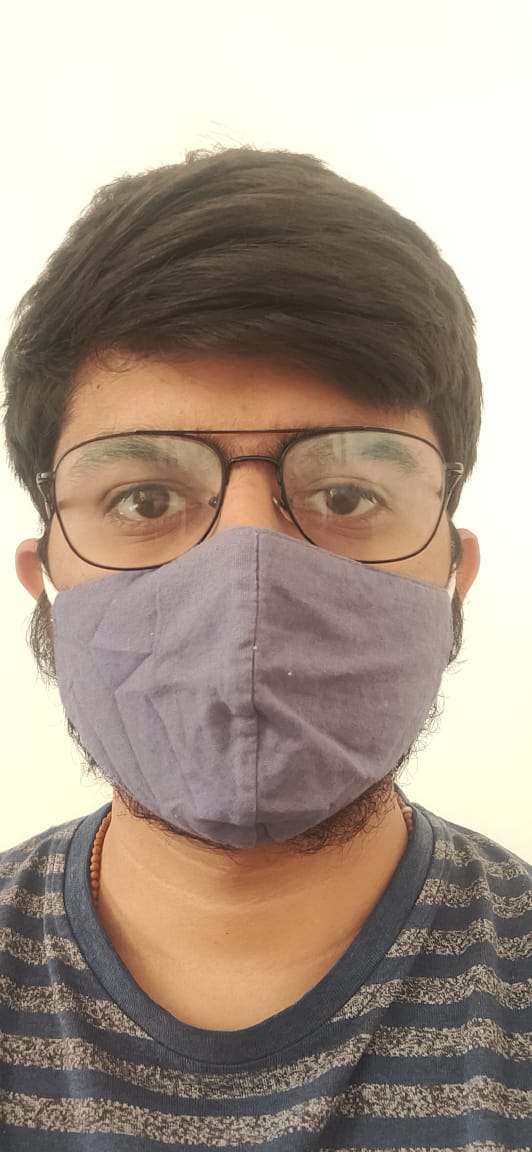

In [49]:
labels=["with_mask","without_mask"]
if(y_pred[0][0]>y_pred[0][1]):
  print(labels[0])
else:
  print(labels[1])

PIL.Image.open(str(dir[0]))

  
